In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Загрузка данных California Housing Prices
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

# Предварительная обработка данных
data = data.dropna()  # Удаляем строки с пропущенными значениями
data['ocean_proximity'] = data['ocean_proximity'].astype('category').cat.codes  # Кодируем категориальные данные

# Определяем признаки и целевую переменную
X = data.drop('median_house_value', axis=1).values  # Признаки
y = data['median_house_value'].values  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразуем данные в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)  # Преобразуем в 2D тензор
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Определяем модель
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 1)  # Один вход и один выход
)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()  # Среднеквадратичная ошибка
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Стохастический градиентный спуск


# Обучение модели
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()  # Переводим модель в режим обучения
    
    # Прямой проход
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # Вычисляем потери
    
    # Обратный проход и оптимизация
    optimizer.zero_grad()  # Обнуляем градиенты
    loss.backward()  # Вычисляем градиенты
    optimizer.step()  # Обновляем параметры модели
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Оценка модели
model.eval()  # Переводим модель в режим оценки
with torch.no_grad():  # Отключаем градиенты
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)  # Вычисляем потери на тестовых данных

print(f'Test Loss: {test_loss.item():.4f}')

/home/pain/anaconda3/lib/python3.12/site-packages/torch/autograd/graph.py:841: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 302: Error loading CUDA libraries. GPU will not be used. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [100/1000], Loss: 6773152256.0000
Epoch [200/1000], Loss: 5577482240.0000
Epoch [300/1000], Loss: 5363380736.0000
Epoch [400/1000], Loss: 5221975552.0000
Epoch [500/1000], Loss: 5119821824.0000
Epoch [600/1000], Loss: 5045251584.0000
Epoch [700/1000], Loss: 4990426112.0000
Epoch [800/1000], Loss: 4949854720.0000
Epoch [900/1000], Loss: 4919643648.0000
Epoch [1000/1000], Loss: 4897009664.0000
Test Loss: 5007107584.0000


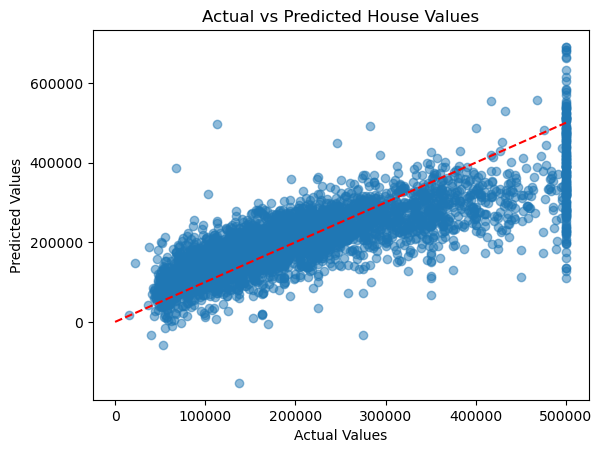

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test_tensor.numpy(), test_outputs.numpy(), alpha=0.5)
plt.plot([0, 500000], [0, 500000], 'r--')  # Линия идеального предсказания
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()